# CM3005 - Data Science Midterm

## Task 1: Domain-Specific Area and Project Objectives

This project focuses on the environmental health research, addressing the challenge of dengue fever prediction in environments with tropical climate. Dengue fever still remains a health challenge in Singapore, with its tropical climate, it creates an ideal conditions for disease transmission. The desease outbreaks poses risks to the population health and healthare resources. This project aims to develop a linear regression model that extinguish the relationship between weather and dengue cases, allowing us to predict and mitigate the disease outbreaks.

Linear regression is an approach that helps us understand how different factors can have some form of relationship that may leads to some serious causes. In this project, this approach allows us to examine the relationship between weather conditions and disease transmission. By analysing weather temperature, rainfall, windspeed, the linear regression model can identify environmental factors that contributes to disease spread. By understanding the factors and relationship, the model will provide a tool for predicting disease outbreak possibilities.

By utilising the linear regression model, the research addressed the challenge where the predictive capabilities in current disease monitering systems are limited. With the linear regression model, it creates an early warning system for the relevant authorities for potential dengue outbreaks. This system allows the relevant authorities to implement prevention strategies, as well as spreading awareness to the public improve the community health preparedness.


## Task 2: Dataset Description
This project utilises a dataset that contains two CSV, namely `sg_weather_record` and `sg_dengue_record`.

**1. Singapore Weather Data `(sg_weather_record)`:**

Singapore weather dataset, collected by the National Environment Agency (NEA) of Singapore providing Singapore's historical daily weather records ranging from 2009 to 2017. This dataset was acquired from a public source at Singapore's Open Data Portal, ensuring that the data is accurate and reliable. The data were stored in a CSV file, containing approximately 2800 entries.

Data Source:
https://data.gov.sg/datasets?resultId=d_03bb2eb67ad645d0188342fa74ad7066&page=1

Column Legend:
|           Title          |        Column name       |     Data type     | Unit of measure |
|:------------------------:|:------------------------:|:-----------------:|:---------------:|
| Date                     | date                     | Date (YYYY-MM-DD) | -               |
| Station                  | station                  | Text              | -               |
| Daily rainfall total     | daily_rainfall_total     | Numeric           | mm              |
| Highest 30 min rainfall  | highest_30_min_rainfall  | Numeric           | mm              |
| Highest 60 min rainfall  | highest_60_min_rainfall  | Numeric           | mm              |
| Highest 120 min rainfall | highest_120_min_rainfall | Numeric           | mm              |
| Mean temperature         | mean_temperature         | Numeric           | Degrees celcius |
| Maximum temperature      | maximum_temperature      | Numeric           | Degrees celcius |
| Minimum temperature      | minimum_temperature      | Numeric           | Degrees celcius |
| Mean wind speed          | mean_wind_speed          | Numeric           | Km/h            |
| Max wind speed           | max_wind_speed           | Numeric           | Km/h            |

<br>

**2. Singapore Dengue Outbreak Data `(sg_weather_record)`:**

Singapore dengue outbreak dataset, collected by the Ministry of Health (MOH) of Singapore providing weekly number of lab-confirmed dengue and dengue haemorrhagic fever cases from 2014 to 2018 in Singapore. This dataset was acquired from a public source at Singapore's Open Data Portal, ensuring that the data is accurate and reliable. The data were stored in a CSV file, containing approximately 530 entries.

Data Source:
https://data.gov.sg/datasets?resultId=d_ac1eecf0886ff0bceefbc51556247015&page=1

Column Legend:
|    Title    | Column name |  Data type  | Unit of measure |
|:-----------:|:-----------:|:-----------:|:---------------:|
| Year        | year        | Year (YYYY) | -               |
| Eweek       | eweek       | Numeric     | Week            |
| Type dengue | type_dengue | Text        | -               |
| Number      | number      | Text        | -               |

## Task 3: Data Preparation

Both of the data from the dataset were provided in the CSV file format, which is common way to store data in a tabular format. The weather dataset contains daily data, including redundant columns like windspeed, weather station and more, which I will remove to focus on the relevant data. Since the dengue dataset is arranged by epidemiological weeks (eweeks), while the weather dataset is daily, I will convert the weather data to match the eweek format by aggregating daily records into weekly data.
The dengue dataset's structure with "Type" as the column header can result in repeated weather conditions and other information when merging both data in one dataset. To address this issue, I will also pivot the dengue data, creating two new separated columns for dengue and DHF cases. This change will avoid duplication of data when merging. Finally, I will merge both dataframe into a single dataframe by inner joining them based on year and eweek.

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
# Path to the datasets
weather_record_path = 'csv/sg_weather_record.csv'
dengue_record_path = 'csv/sg_dengue_record.csv'

# Load and read the datasets
weather_data = pd.read_csv(weather_record_path)
dengue_data = pd.read_csv(dengue_record_path)

# Print the datasets information
print('\nSingapore Weather Data Information\n')
weather_data.info()
print('\nSingapore Dengue Outbreak Dataset Information\n')
dengue_data.info()


Singapore Weather Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2859 non-null   object
 1   station                   2859 non-null   object
 2   daily_rainfall_total      2859 non-null   object
 3   highest_30_min_rainfall   2859 non-null   object
 4   highest_60_min_rainfall   2859 non-null   object
 5   highest_120_min_rainfall  2859 non-null   object
 6   mean_temperature          2859 non-null   object
 7   maximum_temperature       2859 non-null   object
 8   minimum_temperature       2859 non-null   object
 9   mean_wind_speed           2859 non-null   object
 10  max_wind_speed            2859 non-null   object
dtypes: object(11)
memory usage: 245.8+ KB

Singapore Dengue Outbreak Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 

In [4]:
print('Displaying first five entry in weather dataset')
weather_data.head()

Displaying first five entry in weather dataset


,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na


In [5]:
print('Displaying first five entry in dengue dataset')
dengue_data.head()

Displaying first five entry in dengue dataset


,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [6]:
# Drop the columns that are not needed
for cols in ['station', 'highest_30_min_rainfall','highest_60_min_rainfall', 'highest_120_min_rainfall', 'mean_wind_speed', 'max_wind_speed']:
  weather_data = weather_data.drop(cols, axis = 1)

weather_data.head()

,date,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature
0,2009-01-01,na,na,na,na
1,2009-01-02,na,na,na,na
2,2009-01-03,na,na,na,na
3,2009-01-04,na,na,na,na
4,2009-01-05,na,na,na,na


In [7]:
# Convert the columns into numeric to replace the 'na' with NaN values
for cols in ['daily_rainfall_total', 'mean_temperature', 'maximum_temperature', 'minimum_temperature']:
  weather_data[cols] = pd.to_numeric(weather_data[cols], errors = 'coerce')

# Drop the rows with NaN values
weather_data = weather_data.dropna()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2709 entries, 23 to 2847
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2709 non-null   object 
 1   daily_rainfall_total  2709 non-null   float64
 2   mean_temperature      2709 non-null   float64
 3   maximum_temperature   2709 non-null   float64
 4   minimum_temperature   2709 non-null   float64
dtypes: float64(4), object(1)
memory usage: 127.0+ KB


In [8]:
# Convert the date column to pandas datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Get the year from the date
weather_data['Year'] = weather_data['date'].dt.year

# Get the Eweek from the date
# Reference: https://stackoverflow.com/a/31181358
weather_data['Eweek'] = weather_data['date'].dt.isocalendar().week

weather_data.head()

,date,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,Year,Eweek
23,2009-01-24,0.0,26.8,31.4,24.4,2009,4
24,2009-01-25,0.8,25.9,27.8,24.4,2009,4
25,2009-01-26,0.0,25.9,29.6,23.7,2009,5
27,2009-01-28,0.0,26.6,31.9,23.7,2009,5
28,2009-01-29,0.0,26.3,30.0,23.9,2009,5


In [9]:
# Group the weather data by year and Eweek
weekly_weather_data = weather_data.groupby(['Year', 'Eweek'])

# Aggregrate the data
# Group the sum of daily_rainfall_total, mean of mean_temperature, max of maximum_temperature, min of minimum_temperature to the same year and eweek row
weekly_weather_data = weekly_weather_data.agg({'daily_rainfall_total': 'sum', 'mean_temperature': 'mean', 'maximum_temperature': 'max', 'minimum_temperature': 'min'})

# Reset the index
weekly_weather_data.reset_index(inplace = True)

# Rename the columns
weekly_weather_data.rename(columns={'daily_rainfall_total': 'Weekly Rainfall', 'mean_temperature': 'Mean Temperature', 'maximum_temperature': 'Maximum Temperature', 'minimum_temperature': 'Minimum Temperature'}, inplace=True)

weekly_weather_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature
0,2009,4,0.8,26.350000,31.4,24.4
1,2009,5,0.0,26.316667,31.9,23.7
2,2009,6,2.8,26.328571,31.9,23.5
3,2009,7,21.8,27.400000,33.0,23.7
4,2009,8,37.0,27.185714,33.4,23.1


In [10]:
# Rename the columns
dengue_data = dengue_data.rename(columns={'year': 'Year', 'eweek': 'Eweek', 'type_dengue': 'Type', 'number': 'Cases'})

# Convert cases column to numeric and replace the 'na' with NaN values
dengue_data['Cases'] = pd.to_numeric(dengue_data['Cases'], errors = 'coerce')

# Drop the rows with NaN values
dengue_data = dengue_data.dropna()

dengue_data.head()

,Year,Eweek,Type,Cases
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [11]:
# Pivot the table so that the type column will be the column header to prevent duplicate data
dengue_data = dengue_data.pivot(index=['Year', 'Eweek'], columns='Type', values='Cases')

# Rename the columns
dengue_data = dengue_data.rename(columns={'Dengue': 'Dengue Cases', 'DHF': 'DHF Cases'})

# Reset the index
dengue_data.reset_index(inplace=True)

dengue_data.head()

Type,Year,Eweek,DHF Cases,Dengue Cases
0,2014,1,1.0,436.0
1,2014,2,0.0,479.0
2,2014,3,0.0,401.0
3,2014,4,0.0,336.0
4,2014,5,0.0,234.0


In [12]:
# Merge the weather and dengue data by inner join
merged_data = pd.merge(weekly_weather_data, dengue_data, on=['Year', 'Eweek'], how = 'inner')
merged_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature,DHF Cases,Dengue Cases
0,2014,1,13.0,25.825000,31.2,23.6,1.0,436.0
1,2014,2,86.6,26.157143,31.9,23.1,0.0,479.0
2,2014,3,0.2,25.757143,29.6,23.5,0.0,401.0
3,2014,4,0.0,25.271429,29.3,22.5,0.0,336.0
4,2014,5,0.0,25.671429,32.4,21.8,0.0,234.0


## Task 4: Statistical analysis

Performing statistical analysis, which includes measuring the central tendency, spread as well as type of distribution of the merge dataset that merges the weather and dengue outbreak data allows us to understand the data patterns. This analysis will explore the key metrics to achieve useful insights by calculating different statistical metrics. By calculating the central tendency, such as mean, median and mode, it allows us to understand the values within each series that are common. Additionally, by measuring the spread, including variance, standard deviation and range will help us understand the dispersion of the data. Furthermore, skewness and krutosis calculation will also be performed to understand the nature of the data distribution. These analysis will allow us to identify patterns of the dataset, helping us to determine which statistical measures are important and are related to the weather and dengue outbreaks.

In [13]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np

### Measures of Central Tendancy

In [15]:
# Columns to calculate the measures of central tendency, spread and type of distribution
key_metrics = ['Weekly Rainfall', 'Mean Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Dengue Cases', 'DHF Cases']

# Calculate and print the measures of central tendency for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Mean: {merged_data[key].mean():.3f}')
  print(f'- Median: {merged_data[key].median():.3f}')
  print(f'- Mode: {merged_data[key].mode()}')


|---- Weekly Rainfall ----|
- Mean: 37.759
- Median: 30.000
- Mode: 0    0.0
Name: Weekly Rainfall, dtype: float64

|---- Mean Temperature ----|
- Mean: 27.760
- Median: 27.764
- Mode: 0    27.2
Name: Mean Temperature, dtype: float64

|---- Maximum Temperature ----|
- Mean: 33.324
- Median: 33.450
- Mode: 0    33.9
Name: Maximum Temperature, dtype: float64

|---- Minimum Temperature ----|
- Mean: 23.892
- Median: 23.700
- Mode: 0    23.3
Name: Minimum Temperature, dtype: float64

|---- Dengue Cases ----|
- Mean: 227.317
- Median: 212.000
- Mode: 0    51.0
Name: Dengue Cases, dtype: float64

|---- DHF Cases ----|
- Mean: 0.366
- Median: 0.000
- Mode: 0    0.0
Name: DHF Cases, dtype: float64


**Analysis results from the Meaures of Central Tendancy**

- **Weekly Rainfall:** The mean of 37.759mm and median of 30mm shows that weekly rainfall is moderate, though the mode of 0mm suggests that weeks with no rainfall are quite common.
- **Mean Temperature:** The mean of 27.760°C and median of 27.764°C are close, which can be a common temperature in a country with tropical weather. The mode of 27.2°C shows a common temperature.
- **Maximum Temperature:** The mean of 33.324°C and a median of 33.450°C shows a consistent of high maximum temperature, with a mode of 33.9°C.
- **Minimum Temperature:** The mean of 23.892°C and a median of 23.7°C shows a rather low minimum temperate mostly during the night, with the mode of 23.3°C as the most frequent temperature.
- **Dengue Cases:** The mean of 227.317 cases is significantly higher than the mode of 51 cases indicates that while lower case numbers are frequent, large outbreak occuring can raise the average significantly.
- **DHF Cases:** The mean of 0.366 is rather low, and the median being 0 suggests that most weeks have no DHF cases, but some weeks may have spikes.

### Measures of Spread

In [16]:
# Calculate and print the measures of spread for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Variance: {merged_data[key].var():.3f}')
  print(f'- Standard Deviation: {merged_data[key].std():.3f}')
  print(f'- Range: {(merged_data[key].max() - merged_data[key].min()):.3f}')


|---- Weekly Rainfall ----|
- Variance: 1188.824
- Standard Deviation: 34.479
- Range: 201.800

|---- Mean Temperature ----|
- Variance: 0.871
- Standard Deviation: 0.933
- Range: 4.629

|---- Maximum Temperature ----|
- Variance: 1.493
- Standard Deviation: 1.222
- Range: 7.000

|---- Minimum Temperature ----|
- Variance: 0.896
- Standard Deviation: 0.947
- Range: 5.500

|---- Dengue Cases ----|
- Variance: 30102.905
- Standard Deviation: 173.502
- Range: 856.000

|---- DHF Cases ----|
- Variance: 0.430
- Standard Deviation: 0.656
- Range: 4.000


**Analysis results from the Meaures of Spread**
- **Weekly Rainfall:** The high variance of 1188.824 and standard deviation of 34.479 indicates a significant fluctuation in weekly rainfall. The range of 201.8mm shows some occasional heavy rainfall.
- **Mean Temperature:** The variance of 0.871 and standard deviation of 0.933 suggest  that weekly mean temperatures remain relatively consistent with only 4.629°C fluctuation.
- **Maximum Temperature:** The variance of 1.493 and standard deviation of 1.222 shows a occasional rise in peak temperature with the range of 7°C.
- **Minimum Temperature:** The low variance of 0.896 and standard deviation of 0.947 indicates stable minimum temperature with only around 5.5°C range in temperatures.
- **Dengue Cases:** The high variance of 30102.905 and standard deviation of 173.502 suggest that weekly dengue cases fluctuates significantly, with the peak 856 cases difference.
- **DHF Cases:** The low variance of 0.430 but standard deviation of 0.656 shows occasional spikes of DHF cases despite weeks with no DHF cases.

### Type of Distribution

In [17]:
# Calculate and print the measures of skewness and kurtosis for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Skewness: {merged_data[key].skew():.3f}')
  print(f'- Kurtosis: {merged_data[key].kurt():.3f}')


|---- Weekly Rainfall ----|
- Skewness: 1.322
- Kurtosis: 2.749

|---- Mean Temperature ----|
- Skewness: -0.099
- Kurtosis: -0.307

|---- Maximum Temperature ----|
- Skewness: -0.743
- Kurtosis: 1.261

|---- Minimum Temperature ----|
- Skewness: 0.530
- Kurtosis: 0.258

|---- Dengue Cases ----|
- Skewness: 1.261
- Kurtosis: 1.639

|---- DHF Cases ----|
- Skewness: 2.229
- Kurtosis: 6.624


**Analysis results from the Type of Distribution**
- **Weekly Rainfall:** The positive skewness of 1.322 and kurtosis of 2.749 show that there are frequent light rainfalls and occasional heavy rainfall.
- **Mean Temperature:** The skewness of -0.099 and kurtosis of -0.307 suggest a normal mean temperature distribution.
- **Maximum Temperature:** The negative skewness of -0.743 and the positive kurtosis of 1.261 indicate that the data is left skewed, with lesser high maximum temperatures.
- **Minimum Temperature:** The positive skewness of 0.530 shows a right skew, with the kurtosis of 0.258.
- **Dengue Cases:** The positive skewness of 1.261 and kurtosis of 1.639 suggest there are weeks with low case counts but some occasional large outbreaks.
- **DHF Cases:** The high positive skewer of 2.229 and kurtosis 6.624 indicate a distribution with many weeks of zero cases and a few big spikes.


### Analysis of Findings
1. **Dengue and DHF Cases:** The high skewness and variance in Dengue Cases and DHF Cases indicate that while most week have few cases, out breaks can lead to some significant spikes.

2. **Weekly Rainfall:** The positive skewness and high variance in rainfall show that while weeks with light rainfall are common, weeks with high rainfall occur periodically, which might correlate with dengue outbreak.

3. **Temperature:** The analysis shows that the temperatures have rather small fluctuations and close to normal distributions. This proves the consistent weather conditions for a tropical country. This allows us to focus on other factors, such as rainfalls, to be the more important factors of dengue outbreaks.

## Task 5: Data Visualisation

In [18]:
%pip install seaborn
%pip install matplotlib

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
print(merged_data.columns)

Index(['Year', 'Eweek', 'Weekly Rainfall', 'Mean Temperature',
       'Maximum Temperature', 'Minimum Temperature', 'DHF Cases',
       'Dengue Cases'],
      dtype='object')


In [21]:
merged_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature,DHF Cases,Dengue Cases
0,2014,1,13.0,25.825000,31.2,23.6,1.0,436.0
1,2014,2,86.6,26.157143,31.9,23.1,0.0,479.0
2,2014,3,0.2,25.757143,29.6,23.5,0.0,401.0
3,2014,4,0.0,25.271429,29.3,22.5,0.0,336.0
4,2014,5,0.0,25.671429,32.4,21.8,0.0,234.0


### Rainfall vs Dengue Cases (Scatter Plot with Regression Line)

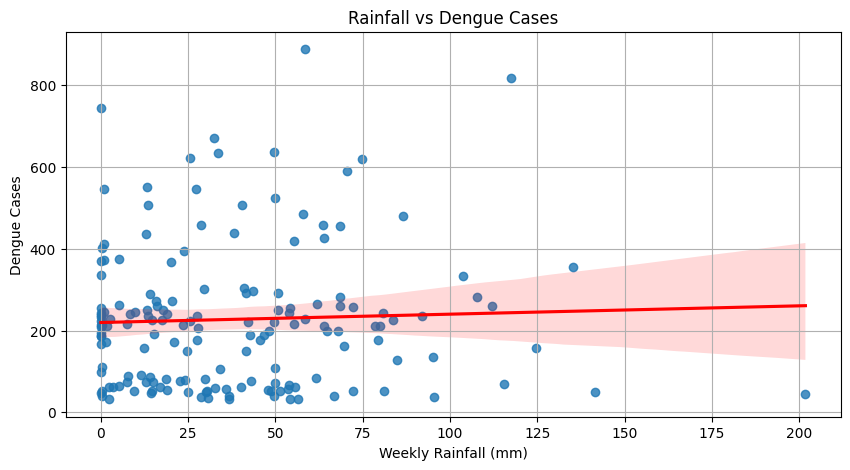

In [22]:
plt.figure(figsize = (10, 5))

# Use the weekly rainfall and dengue cases from the merged dataset to plot the scatter plot
sns.regplot(data = merged_data, x = 'Weekly Rainfall', y = 'Dengue Cases', line_kws = {"color": "red"})

# Graph properties
plt.title('Rainfall vs Dengue Cases')
plt.xlabel('Weekly Rainfall (mm)')
plt.ylabel('Dengue Cases')
plt.grid()

plt.show()

**Analysis from Rainfall vs Dengue Cases (Scatter Plot with Regression Line)**

The scatter plot with regression line shows the relationship between weekly rainfall and dengue cases. The X-axis shows the the weekly rainfall in milimeters, while the Y-axis shows the number of dengue cases. Each of the blue dot represents to a weekly data of the number of dengue cases with various rainfall sizes. The red regression line shows a slight positive correlation of the rainfall and dengue cases, which means that increased rainfall can caused dengue cases to rise. The half transparent shaded area around the regression line represents the confidence level of the trend.

From the graph, its clear that most dengue cases cluster between 0 to 400 cases regardless of rainfall amount. There are also some outlier points with 600 to 800 dengue cases across different rainfall levels. Although there are some point that shows the increase in dengue cases with increased rainfall, the relationship is not as strong, as indicated by the regression line. The positive trend suggests that higher rainfall could be associated with a slight increase in dengue case. However, the spreadness of data points suggests that other factors could also be a factor of dengue outbreaks. The wide confidence around the regression line shows the fluctuations in the relationship. This suggest that rainfall alone is not a strong factor of dengue cases.

Although rainfall provides breeding grounds for dengue mosquitoes, it appears that rainfall alone does not fully determine the number of dengue cases. Other factors such as temperature and environent conditions are likely to be the factor. To find the factors that might have stronger correlation with the dengue cases, a correlation heatmap will be utilised for the next analysis.

### Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)

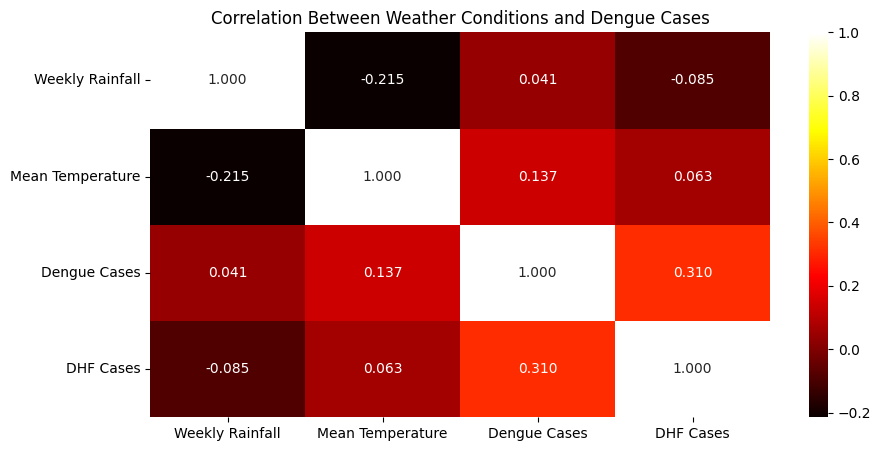

In [23]:
# Use information from the merged dataset
correlation_matrix = merged_data[['Weekly Rainfall', 'Mean Temperature', 'Dengue Cases', 'DHF Cases']].corr()
plt.figure(figsize=(10, 5))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt='.3f')
plt.title("Correlation Between Weather Conditions and Dengue Cases")
plt.show()

**Analysis from Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)**

The heatmap shows the correlation level for weekly rainfall, mean temperature, maximum temperature, minimum temperature, dengue cases, and DHF cases. The colour gradient in the graph indicates the strength of the correlation, which the white and brighter red shades indicate positive correlations, while the darker shades indicate weak correlation. The correlation values are shown in each of the cell.

In the heatmap, we can see a weak correlation of 0.041 between rainfall and dengue cases, which aligns with the previous "Rainfall vs Dengue Cases (Scatter Plot with Regression Line)" analysis. In contrast to the rainfall, mean temperature has a slightly stronger positive correlation of 0.137, which indicates that temperature might be the bigger factor than rainfall for dengue outbreaks. DHF and dengue cases have a positive corelation of 0.31, which means DHF cases usually occur when there is a dengue outbreak.